In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [120]:
df=pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [121]:
df.shape

(1048567, 9)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [123]:
df1=df[['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)']]
df1.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,F,JAMSHEDPUR,17819.05,25.0
1,M,JHAJJAR,2270.69,27999.0
2,F,MUMBAI,17874.44,459.0
3,F,MUMBAI,866503.21,2060.0
4,F,NAVI MUMBAI,6714.43,1762.5


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustGender               1047467 non-null  object 
 1   CustLocation             1048416 non-null  object 
 2   CustAccountBalance       1046198 non-null  float64
 3   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), object(2)
memory usage: 32.0+ MB


In [125]:
df1.dtypes

CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionAmount (INR)    float64
dtype: object

In [126]:
df1.isnull().sum()

CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64

In [127]:
df1.groupby('CustGender').mean()

C:\Users\power\AppData\Local\Temp\ipykernel_10912\179225280.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('CustGender').mean()


,CustAccountBalance,TransactionAmount (INR)
CustGender,,
F,109799.607822,1655.733753
M,117592.033084,1543.564378
T,50050.000000,32500.000000


In [128]:
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
CustAccountBalance,1.000000,-0.004094,0.062623
TransactionTime,-0.004094,1.000000,0.007915
TransactionAmount (INR),0.062623,0.007915,1.000000


In [129]:
df1.duplicated().sum()

180688

In [130]:
df1=df1.drop_duplicates()

In [131]:
df1.shape

(867879, 4)

In [132]:
df1.describe()

,CustAccountBalance,TransactionAmount (INR)
count,8.659350e+05,8.678790e+05
mean,1.238656e+05,1.668949e+03
std,9.017573e+05,6.546341e+03
min,0.000000e+00,0.000000e+00
25%,5.099680e+03,2.000000e+02
50%,1.814328e+04,5.120000e+02
75%,6.253111e+04,1.400000e+03
max,1.150355e+08,1.560035e+06


In [133]:
df1.skew(numeric_only=True)

CustAccountBalance         59.127806
TransactionAmount (INR)    54.878548
dtype: float64

In [134]:
numerical_features=['CustAccountBalance','TransactionAmount (INR)']

In [135]:
categorical_features=['CustGender','CustLocation']

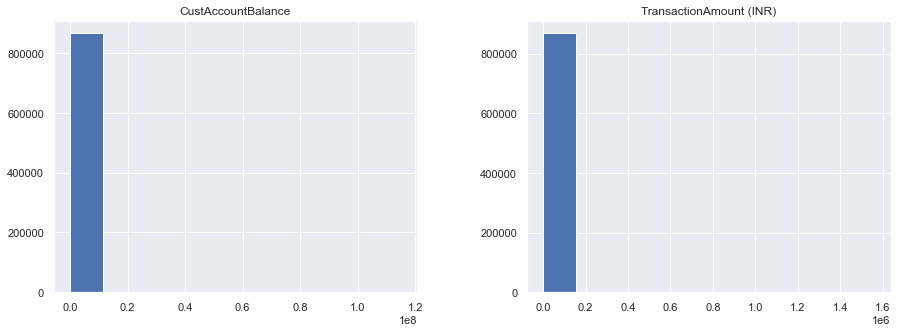

In [136]:
df1[numerical_features].hist(bins=10,figsize=(15,5))
plt.show()

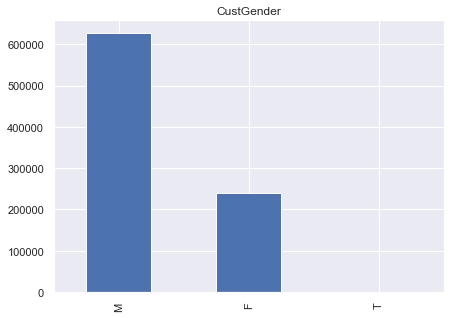

In [137]:
plt.figure(figsize=(7,5))
df1['CustGender'].value_counts().plot(kind='bar').set_title('CustGender')
plt.show()

In [138]:
df1[df1['CustGender']=='T'].shape

(1, 4)

In [139]:
df1=df1[df1['CustGender']!='T']
df1.shape

(867878, 4)

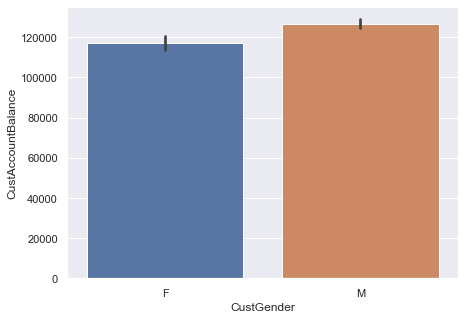

In [140]:
plt.figure(figsize=(7,5))
sns.barplot(data=df1,x='CustGender',y='CustAccountBalance')
plt.show()

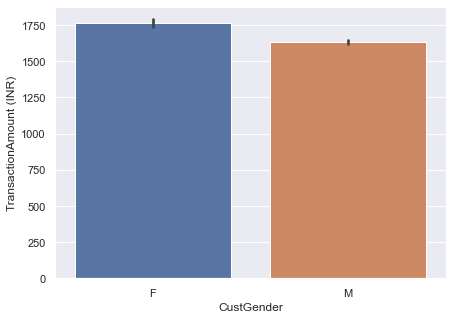

In [141]:
plt.figure(figsize=(7,5))
sns.barplot(data=df1,x='CustGender',y='TransactionAmount (INR)')
plt.show()

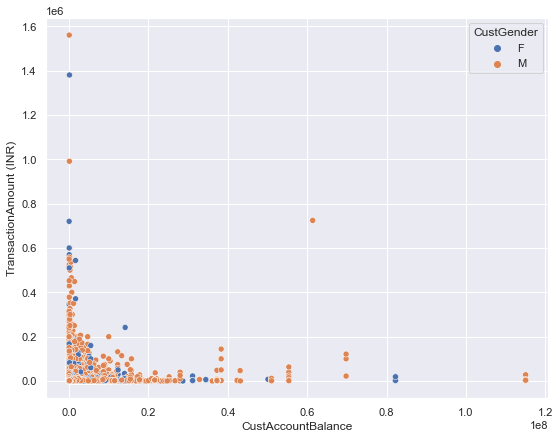

In [142]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df1,x='CustAccountBalance',y='TransactionAmount (INR)',hue='CustGender')
plt.show()

In [143]:
def count_outliers(data,col):
    q1=data[col].quantile(0.25,interpolation='nearest')
    q2=data[col].quantile(0.5,interpolation='nearest')
    q3=data[col].quantile(0.75,interpolation='nearest')
    q4=data[col].quantile(1,interpolation='nearest')
    IQR=q3-q1
    global LLP
    global ULP
    LLP=q1-1.5*IQR
    ULP=q3+1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print('No outliers in',i)
    else:
        print('There are outliers in',i)
        x=data[data[col]<LLP][col].size
        y=data[data[col]>ULP][col].size
        a.append(i)
        print('Count of outliers are',x+y)
global a 
a=[]
for i in numerical_features:
    count_outliers(df1,i)

There are outliers in CustAccountBalance
Count of outliers are 117422
There are outliers in TransactionAmount (INR)
Count of outliers are 86873


In [144]:
df1=df1.dropna(subset=['CustGender','CustLocation'])

In [145]:
df1.isnull().sum()

CustGender                    0
CustLocation                  0
CustAccountBalance         1944
TransactionAmount (INR)       0
dtype: int64

In [146]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df1['CustAccountBalance']=imputer.fit_transform(df1['CustAccountBalance'].values.reshape(-1,1))

In [147]:
df1.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64

In [148]:
df1.shape

(866934, 4)

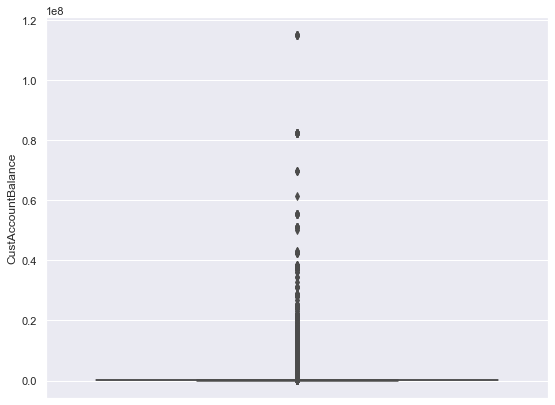

In [149]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df1,y='CustAccountBalance')
plt.show()

In [150]:
df1['CustAccountBalance'].mean()

123952.97624595664

In [151]:
df1[df1['CustAccountBalance']>130000].shape

(129202, 4)

In [152]:
df1=df1[df1['CustAccountBalance']<130000]
df1.shape

(737732, 4)

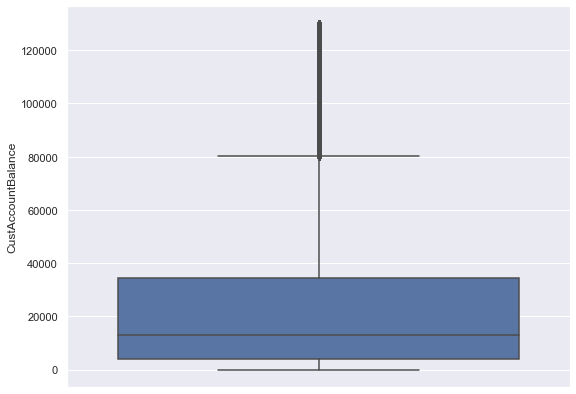

In [153]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df1,y='CustAccountBalance')
plt.show()

In [154]:
df1[df1['CustAccountBalance']>80000].shape

(56444, 4)

In [155]:
df1=df1[df1['CustAccountBalance']<80000]
df1.shape

(681288, 4)

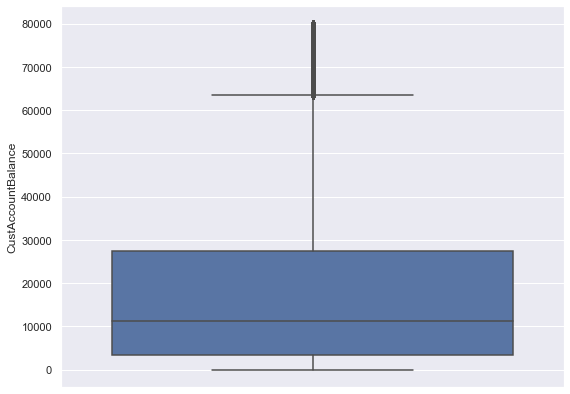

In [156]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df1,y='CustAccountBalance')
plt.show()

In [157]:
df1[df1['CustAccountBalance']>62000].shape

(33924, 4)

In [158]:
df1=df1[df1['CustAccountBalance']<62000]
df1.shape

(647364, 4)

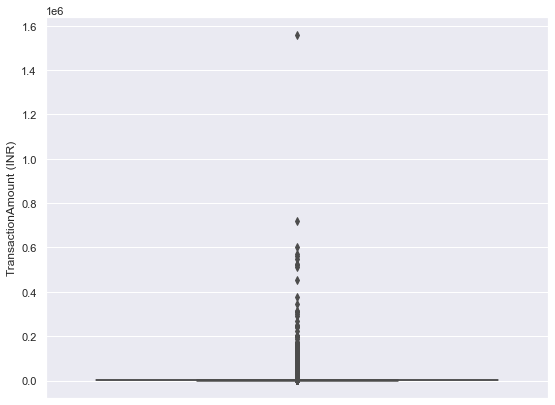

In [159]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df1,y='TransactionAmount (INR)')
plt.show()

In [160]:
df1['TransactionAmount (INR)'].mean()

1285.8353985238602

In [161]:
df1[df1['TransactionAmount (INR)']>3000].shape

(52732, 4)

In [162]:
df1=df1[df1['TransactionAmount (INR)']<3000]
df1.shape

(593147, 4)

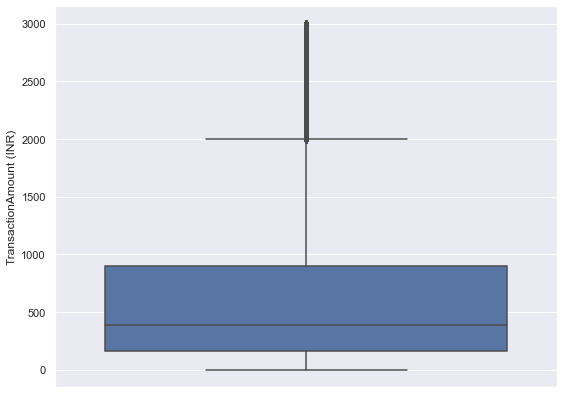

In [163]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df1,y='TransactionAmount (INR)')
plt.show()

In [164]:
df1[df1['TransactionAmount (INR)']>1800].shape

(47194, 4)

In [165]:
df1=df1[df1['TransactionAmount (INR)']<1800]
df1.shape

(545029, 4)

In [166]:
df1['CustGender'].value_counts()

M    402386
F    142643
Name: CustGender, dtype: int64

In [167]:
df1['CustLocation'].value_counts()

MUMBAI                           49345
BANGALORE                        45192
NEW DELHI                        37485
DELHI                            35600
GURGAON                          35455
                                 ...  
KHARODI KHARODI MUMBAI MUMBAI        1
AL NAKHEEL                           1
KHUTWAD NGR NASHIK                   1
PRIMARY SCHOOL HYDERABAD             1
MANDIR DHANBAD                       1
Name: CustLocation, Length: 7256, dtype: int64

In [168]:
df1.drop(['CustLocation','CustGender'],axis=1,inplace=True)

In [169]:
df1.head()

,CustAccountBalance,TransactionAmount (INR)
0,17819.05,25.0
2,17874.44,459.0
4,6714.43,1762.5
5,53609.20,676.0
6,973.46,566.0


In [170]:
df1.std().mean()

7892.357369273534

In [171]:
scaler=StandardScaler()

In [172]:
df1=scaler.fit_transform(df1)
df1

array([[ 0.1873557 , -1.05189401],
       [ 0.19096416, -0.05348646],
       [-0.53607194,  2.94518692],
       ...,
       [-0.4760876 ,  0.72867614],
       [ 0.80575081, -0.05118598],
       [-0.31434958,  1.19107227]])

In [173]:
df1.std().mean()

1.0

In [174]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0,n_init=10)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

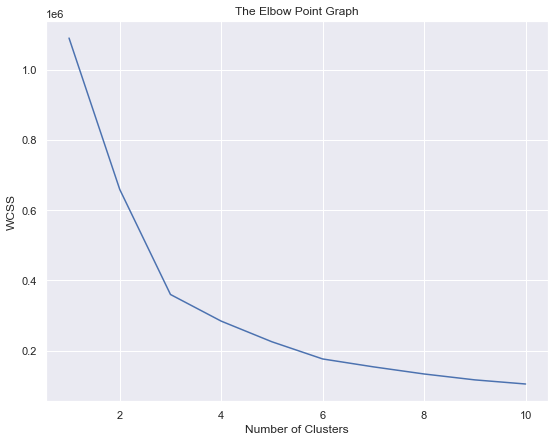

In [175]:
sns.set()
plt.figure(figsize=(9,7))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [176]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=0,n_init=10)
y=kmeans.fit_predict(df1)
y[:50]

array([0, 0, 1, 5, 2, 2, 3, 5, 0, 5, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 5,
       3, 1, 1, 2, 5, 3, 3, 2, 3, 0, 3, 3, 2, 3, 3, 0, 2, 3, 2, 4, 0, 3,
       3, 0, 0, 3, 0, 2])

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


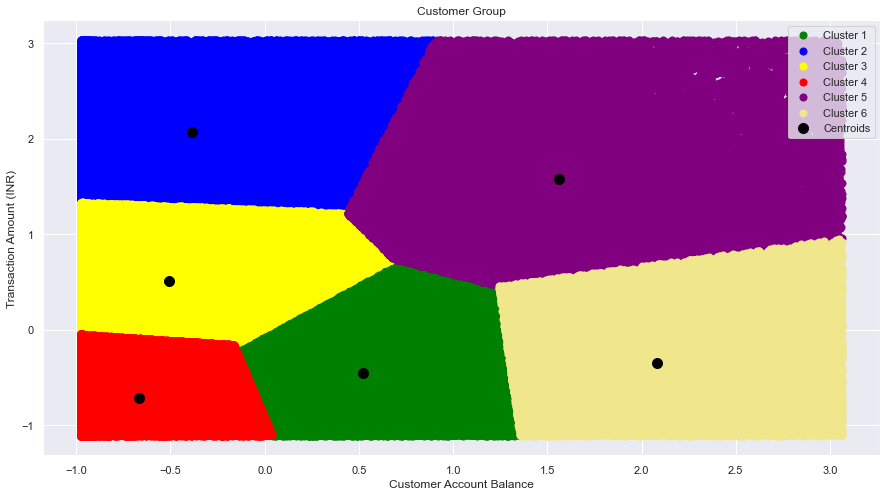

In [177]:
plt.figure(figsize=(15,8))
plt.scatter(df1[y==0,0],df1[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(df1[y==1,0],df1[y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(df1[y==2,0],df1[y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(df1[y==3,0],df1[y==3,1],s=50,c='red',label='Cluster 4')
plt.scatter(df1[y==4,0],df1[y==4,1],s=50,c='purple',label='Cluster 5')
plt.scatter(df1[y==5,0],df1[y==5,1],s=50,c='khaki',label='Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('Customer Group')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.legend()
plt.show()